In [1]:
## Notebook env: mirtud_env (mirtud_env kernel)
### This notebook analyzes how well the model in MAVE_trial.ipynb (and MAVE_trial.nbconvert.ipynb)
## learned the data by analyzing the pearson Rs for each cell between inputted raw data and 
## MAVE reconstructed output data
### The notebook also looks at stabilization of loss functions 
##loss_scalers = [100, 1, 0.1, 100]

%load_ext rpy2.ipython

In [2]:
%%R
library(ggplot2)
library(stringr)
library(tidyr)
library(ggpointdensity)

In [5]:
%%R
Loss <- read.csv('/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/logs/R100_K0.001_C0.1_T100_training.log.2022-12-17_16034028.963902', sep ='\t')
colnames(Loss)[2] <- 'Total_Loss'
Loss$Recon_Loss <- str_sub(Loss$Recon_Loss, start = 8, end = 17)
Loss$KLD_Loss <- str_sub(Loss$KLD_Loss, start = 8, end = 13)
Loss$Classification_Loss <- str_sub(Loss$Classification_Loss, start = 8, end = 13)
Loss$Triplet_Loss <- str_sub(Loss$Triplet_Loss, start = 8, end = 13)
Loss[,3:6] <- apply(Loss[,3:6], 2, as.numeric)


Loss$Recon_Loss <- Loss$Recon_Loss/max(Loss$Recon_Loss)
Loss$KLD_Loss <- Loss$KLD_Loss/max(Loss$KLD_Loss)
Loss$Classification_Loss <- Loss$Classification_Loss/max(Loss$Classification_Loss)
Loss$Triplet_Loss <- Loss$Triplet_Loss/max(Loss$Triplet_Loss)


Individual_losses <- pivot_longer(Loss, cols = 3:6, names_to = 'Loss_type', values_to = 'Loss')


In [6]:
%%R
Loss

    Epoch Total_Loss Recon_Loss    KLD_Loss Classification_Loss Triplet_Loss
1       0   894.3221  0.9264326 0.037655719           0.9800307    0.5998331
2       1 12821.6406  1.0000000 1.000000000           1.0000000    1.0000000
3       2  2250.4514  0.7804211 0.152054684           0.9806027    0.6278460
4       3  3443.3340  0.7270909 0.250234590           0.9875151    0.6539516
5       4  6607.2256  0.7244595 0.506204498           0.9975815    0.7507450
6       5  5059.4629  0.6806638 0.382438117           0.9917802    0.7010371
7       6  2329.9851  0.6272430 0.163412069           0.9824493    0.6216474
8       7  1607.7117  0.6176447 0.105306585           0.9792954    0.6128263
9       8  2789.6772  0.6296705 0.200541983           0.9787888    0.6231970
10      9  3474.8140  0.6242031 0.256131694           0.9794915    0.6406604
11     10  2648.3862  0.5992668 0.190090600           0.9780534    0.6311837
12     11  1405.3668  0.5711560 0.090454619           0.9766644    0.6113959

9              0 2022-12-17 16:38:50.408512
10             0 2022-12-17 16:39:15.536892
11             0 2022-12-17 16:39:40.946615
12             0 2022-12-17 16:40:12.384306
13             0 2022-12-17 16:40:38.034290
14             0 2022-12-17 16:41:05.372207
15             0 2022-12-17 16:41:32.099393
16             0 2022-12-17 16:41:59.513215
17             0 2022-12-17 16:42:24.416004
18             0 2022-12-17 16:42:47.169164
19             0 2022-12-17 16:43:20.535241
20             0 2022-12-17 16:43:46.936021
21             0 2022-12-17 16:44:13.310104
22             0 2022-12-17 16:44:42.987736
23             0 2022-12-17 16:45:07.005132
24             0 2022-12-17 16:45:35.356970
25             0 2022-12-17 16:46:02.022962
26             0 2022-12-17 16:46:31.332756
27             0 2022-12-17 16:46:55.853589
28             0 2022-12-17 16:47:23.558943
29             0 2022-12-17 16:47:47.905997
30             0 2022-12-17 16:48:13.704750
31             0 2022-12-17 16:4

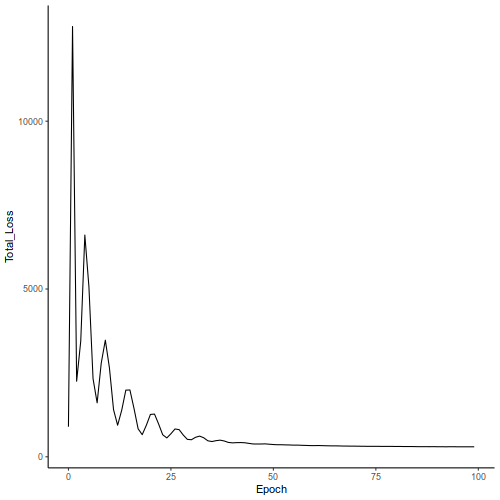

In [7]:
%%R -h 500 -w 500
Total_loss_plot <- ggplot(Loss, aes(Epoch, Total_Loss)) + geom_path() + theme_classic()
Total_loss_plot

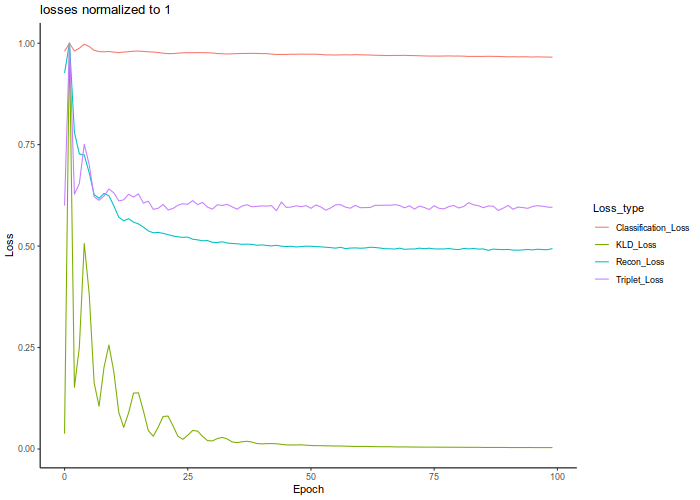

In [8]:
%%R -h 500 -w 700
Individual_loss_plot <- ggplot(Individual_losses, aes(Epoch, Loss, color = Loss_type)) + geom_path() + theme_classic() + ggtitle("losses normalized to 1")
Individual_loss_plot

In [9]:
%%R
Rs <- read.csv('/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/R100_K0.001_C0.1_T100_R_tbl.csv')

epoch_1 = as.numeric(Rs[1,])
epoch_50 = as.numeric(Rs[50,])
epoch_100 = as.numeric(Rs[100,])

df <- data.frame(epoch_1, epoch_50, epoch_100)
df <- pivot_longer(df, cols = 1:3, names_to = 'Epoch', values_to = 'Rs')

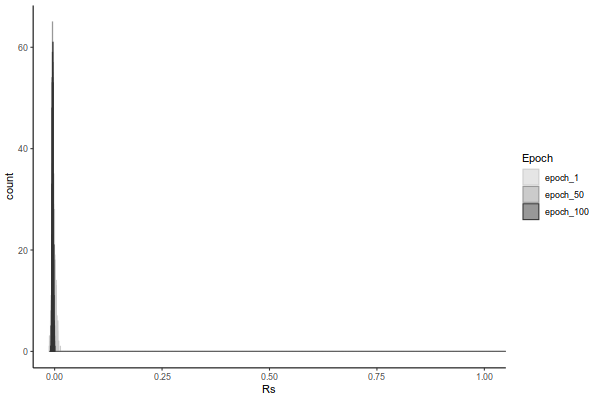

In [10]:
%%R -h 400 -w 600
df$Epoch <- factor(df$Epoch, levels = c('epoch_1', 'epoch_50', 'epoch_100'))
R_learning <- ggplot(df, aes(x=Rs, fill=Epoch, color=Epoch)) +
geom_histogram(position="identity", alpha=0.5, bins = 200000) + scale_color_grey(start = 0.8, end = 0.2) +
scale_fill_grey(start = 0.8, end = 0.2) +
theme_classic() + coord_cartesian(xlim = c(0,1))
R_learning

In [11]:
%%R
medians <- matrixStats::rowMedians(as.matrix(Rs))
Loss$medians <- medians

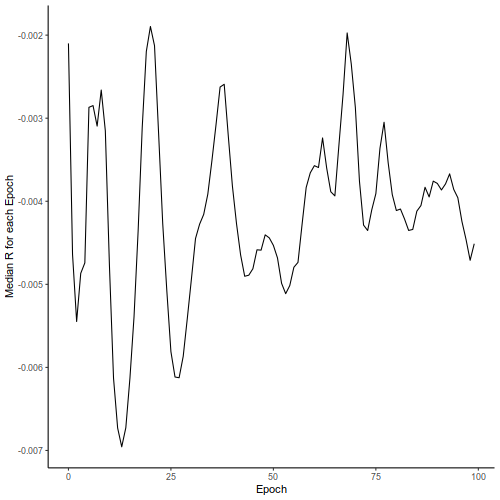

In [12]:
%%R -h 500 -w 500
R_median_plot <-ggplot(Loss, aes(Epoch, medians)) + geom_path() + ylab('Median R for each Epoch') + theme_classic()
R_median_plot

In [13]:
%%R
UMAP_output <- read.csv("/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/R100_K0.001_C0.1_T100_UMAP-OF-MU.tsv.gz", sep = '\t', row.names = 1)
head(UMAP_output)

                              UMAP1    UMAP2           guide
miR_2:AGGTAGGCAAATCAAG-1  2.7724872 2.182262  hsa-miR-522-3p
miR_2:GAAACCTAGACCAAGC-1  2.9287863 2.446256       TuD_NC_01
miR_3:ATACCTTCATGACCCG-1 -0.7783183 4.959238 hsa-miR-130b-3p
miR_3:GTCAGCGTCCCTCGAT-1  0.4870347 5.049380  hsa-miR-625-3p
miR_1:GAGGCCTCACTTGAGT-1  3.9124885 2.929956     hsa-miR-429
miR_1:AAGACAACAACCTAAC-1  0.6998594 2.947058   hsa-miR-17-3p


In [14]:
%%R
library(dplyr)
MAVE_latent_2dims <- read.csv("/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/R100_K0.001_C0.1_T100_scMAVE_mu-matrix.tsv.gz", sep = '\t', row.names = 1)
MAVE_latent_2dims <- select(MAVE_latent_2dims, LV.mu.0, LV.mu.1)
MAVE_latent_2dims$guide <- UMAP_output$guide
head(MAVE_latent_2dims)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




                             LV.mu.0     LV.mu.1           guide
miR_2:AGGTAGGCAAATCAAG-1  0.17934890 -0.18569544  hsa-miR-522-3p
miR_2:GAAACCTAGACCAAGC-1  0.23135230 -0.12652168       TuD_NC_01
miR_3:ATACCTTCATGACCCG-1  0.07550402 -0.12609854 hsa-miR-130b-3p
miR_3:GTCAGCGTCCCTCGAT-1  0.06219256  0.14811784  hsa-miR-625-3p
miR_1:GAGGCCTCACTTGAGT-1  0.24412625  0.04800679     hsa-miR-429
miR_1:AAGACAACAACCTAAC-1 -0.08879407 -0.06497990   hsa-miR-17-3p


In [15]:
%%R
guides = unique(MAVE_latent_2dims$guide)
tmp_df = as.data.frame(matrix(0, nrow = nrow(MAVE_latent_2dims), ncol = length(guides)))
colnames(tmp_df) = guides
for (i in 1:length(guides)){
    guide_cells = MAVE_latent_2dims$guide == guides[i]
    vec = MAVE_latent_2dims$guide
    vec[guide_cells] = 'Guide'
    vec[!guide_cells] = 'N/A'
    tmp_df[,i] <- vec
}
MAVE_latent_2dims = cbind(MAVE_latent_2dims, tmp_df)

In [16]:
%%R
guides = unique(UMAP_output$guide)
tmp_df = as.data.frame(matrix(0, nrow = nrow(UMAP_output), ncol = length(guides)))
colnames(tmp_df) = guides
for (i in 1:length(guides)){
    guide_cells = UMAP_output$guide == guides[i]
    vec = UMAP_output$guide
    vec[guide_cells] = 'Guide'
    vec[!guide_cells] = 'N/A'
    tmp_df[,i] <- vec
}
UMAP_output_2dims = cbind(UMAP_output, tmp_df)

In [17]:
%%R
print(paste(nrow(MAVE_latent_2dims), 'rows'))
print(paste(ncol(MAVE_latent_2dims), 'columns'))
head(MAVE_latent_2dims[, 1:5])

[1] "500 rows"
[1] "268 columns"
                             LV.mu.0     LV.mu.1           guide hsa-miR-522-3p
miR_2:AGGTAGGCAAATCAAG-1  0.17934890 -0.18569544  hsa-miR-522-3p          Guide
miR_2:GAAACCTAGACCAAGC-1  0.23135230 -0.12652168       TuD_NC_01            N/A
miR_3:ATACCTTCATGACCCG-1  0.07550402 -0.12609854 hsa-miR-130b-3p            N/A
miR_3:GTCAGCGTCCCTCGAT-1  0.06219256  0.14811784  hsa-miR-625-3p            N/A
miR_1:GAGGCCTCACTTGAGT-1  0.24412625  0.04800679     hsa-miR-429            N/A
miR_1:AAGACAACAACCTAAC-1 -0.08879407 -0.06497990   hsa-miR-17-3p            N/A
                         TuD_NC_01
miR_2:AGGTAGGCAAATCAAG-1       N/A
miR_2:GAAACCTAGACCAAGC-1     Guide
miR_3:ATACCTTCATGACCCG-1       N/A
miR_3:GTCAGCGTCCCTCGAT-1       N/A
miR_1:GAGGCCTCACTTGAGT-1       N/A
miR_1:AAGACAACAACCTAAC-1       N/A


In [18]:
%%R
UMAP_output[1:5,c(1,2)]

                              UMAP1    UMAP2
miR_2:AGGTAGGCAAATCAAG-1  2.7724872 2.182262
miR_2:GAAACCTAGACCAAGC-1  2.9287863 2.446256
miR_3:ATACCTTCATGACCCG-1 -0.7783183 4.959238
miR_3:GTCAGCGTCCCTCGAT-1  0.4870347 5.049380
miR_1:GAGGCCTCACTTGAGT-1  3.9124885 2.929956


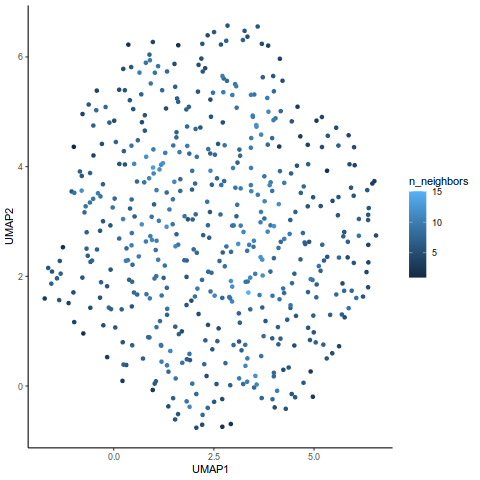

In [19]:
%%R
## density plot of cells plotted in UMAP1/UMAP2 space
library(ggplot2)
library(ggpointdensity)
library(stringr)
ggplot(UMAP_output, aes(UMAP1, UMAP2)) + geom_pointdensity() + theme_classic() +
xlab('UMAP1') + ylab('UMAP2')

In [20]:
%%R
MAVE_latent_2dims[1:5,1:5]

                            LV.mu.0     LV.mu.1           guide hsa-miR-522-3p
miR_2:AGGTAGGCAAATCAAG-1 0.17934890 -0.18569544  hsa-miR-522-3p          Guide
miR_2:GAAACCTAGACCAAGC-1 0.23135230 -0.12652168       TuD_NC_01            N/A
miR_3:ATACCTTCATGACCCG-1 0.07550402 -0.12609854 hsa-miR-130b-3p            N/A
miR_3:GTCAGCGTCCCTCGAT-1 0.06219256  0.14811784  hsa-miR-625-3p            N/A
miR_1:GAGGCCTCACTTGAGT-1 0.24412625  0.04800679     hsa-miR-429            N/A
                         TuD_NC_01
miR_2:AGGTAGGCAAATCAAG-1       N/A
miR_2:GAAACCTAGACCAAGC-1     Guide
miR_3:ATACCTTCATGACCCG-1       N/A
miR_3:GTCAGCGTCCCTCGAT-1       N/A
miR_1:GAGGCCTCACTTGAGT-1       N/A


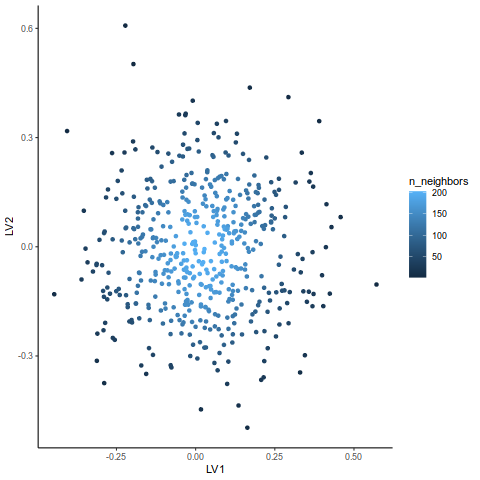

In [21]:
%%R
## density plot of cells plotted in LV.mu.0/LV.mu.1 space
library(ggplot2)
library(ggpointdensity)
library(stringr)
ggplot(MAVE_latent_2dims[,c(1,2)], aes(LV.mu.0, LV.mu.1)) + geom_pointdensity() + theme_classic() +
xlab('LV1') + ylab('LV2')


In [22]:
%%R
plts <- list()
for (i in 1:length(1:length(guides))){
    tmp <- MAVE_latent_2dims[,c(1,2,(i+3))]
    colnames(tmp)[3] <- 'Type'
    tmp <- tmp[order(tmp$Type, decreasing = TRUE),]
    if (str_sub(guides[i], start = 1, end = 6) == 'TuD_NC'){
        plts[[i]] <- ggplot(tmp, aes(LV.mu.0, LV.mu.1, color = Type)) + geom_point() + 
        theme_classic() + scale_color_manual(values = c('#39568CFF', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
        ggtitle(guides[i]) + xlab('LV1') + ylab('LV2')
    } else {
        plts[[i]] <- ggplot(tmp, aes(LV.mu.0, LV.mu.1, color = Type)) + geom_point() + 
        theme_classic() + scale_color_manual(values = c('red', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
        ggtitle(guides[i]) + xlab('LV1') + ylab('LV2')
    }
}


In [23]:
%%R
plts2 <- list()
for (i in 1:length(1:length(guides))){
    tmp <- UMAP_output_2dims[,c(1,2,(i+3))]
    colnames(tmp)[3] <- 'Type'
    tmp <- tmp[order(tmp$Type, decreasing = TRUE),]
    if (str_sub(guides[i], start = 1, end = 6) == 'TuD_NC'){
        plts2[[i]] <- ggplot(tmp, aes(UMAP1, UMAP2, color = Type)) + geom_point() + 
        theme_classic() + scale_color_manual(values = c('#39568CFF', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
        ggtitle(guides[i]) + xlab('UMAP1') + ylab('UMAP2')
    } else {
        plts2[[i]] <- ggplot(tmp, aes(UMAP1, UMAP2, color = Type)) + geom_point() + 
        theme_classic() + scale_color_manual(values = c('red', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
        ggtitle(guides[i]) + xlab('UMAP1') + ylab('UMAP2')
    }
}


In [24]:
%%R
library(ggpubr)
umap_plts <- rep(list('empty'), ceiling(length(plts2)/25))
for (i in 1:ceiling(length(plts2)/25)){
    umap_plts[[i]] <- ggarrange(plotlist = plts2[(25*(i-1)+1):(25*i)], ncol = 5, nrow = 5, legend = 'none')
}

In [25]:
%%R
library(ggpubr)
latent_plts <- rep(list('empty'), ceiling(length(plts)/25))
for (i in 1:ceiling(length(plts)/25)){
    latent_plts[[i]] <- ggarrange(plotlist = plts[(25*(i-1)+1):(25*i)], ncol = 5, nrow = 5, legend = 'none')
}

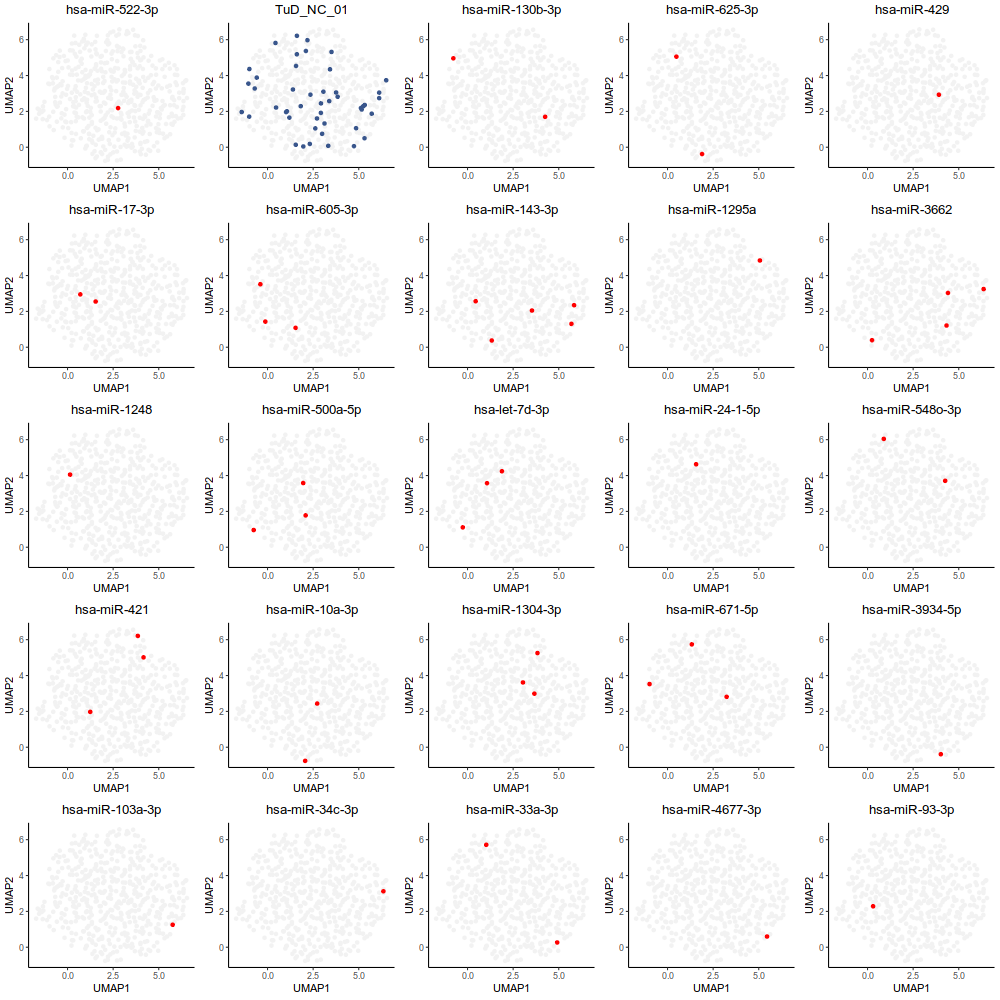

In [26]:
%%R -w 1000 -h 1000
## non-targeting control guides are blue and targeting guides are red
umap_plts[[1]]

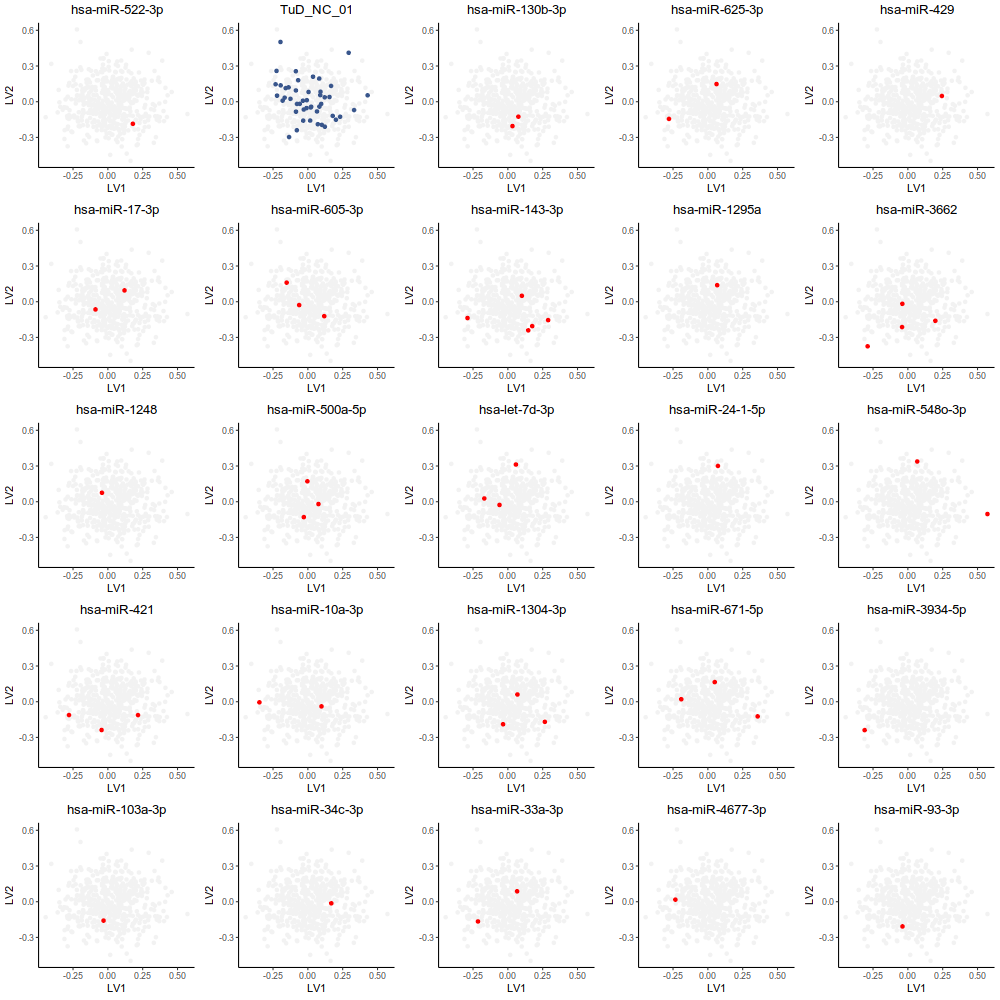

In [27]:
%%R -w 1000 -h 1000
## non-targeting control guides are blue and targeting guides are red
latent_plts[[1]]